In [1]:
using PyCall
using PyPlot

@pyimport sys
pushfirst!(PyVector(pyimport("sys")["path"]), "/Users/ikumakiyoshi/Library/Mobile Documents/com~apple~CloudDocs/study_fg_rm/program/Deltamap_test/julia_delta-map/function_julia")

@pyimport cmb_make_file as cmb_make
@pyimport data_m_make as m_make

include("/Users/ikumakiyoshi/Library/Mobile Documents/com~apple~CloudDocs/study_fg_rm/program/Deltamap_test/julia_delta-map/function_julia/make_data_m.jl")
include("/Users/ikumakiyoshi/Library/Mobile Documents/com~apple~CloudDocs/study_fg_rm/program/Deltamap_test/julia_delta-map/function_julia/Delta_map.jl")

calc_clean_map (generic function with 1 method)

In [2]:
random_seed_cmb = 5123
seed_syn = 12345
nside = 4

r =0.01

cmb_data = cmb_make.cmb_make_file(nside, r, random_seed_cmb, seed_syn);

In [14]:
import Healpix

#m_I = Healpix.readMapFromFITS("/Users/ikumakiyoshi/Library/Mobile Documents/com~apple~CloudDocs/study_fg_rm/program/Deltamap_test/julia_delta-map/fg_map_data/Dust_40_GHz_nside_4", 1, Float64)
#m_Q = Healpix.readMapFromFITS("/Users/ikumakiyoshi/Library/Mobile Documents/com~apple~CloudDocs/study_fg_rm/program/Deltamap_test/julia_delta-map/fg_map_data/Synch_40_GHz_nside_4", 2, Float64)
#m_U = Healpix.readMapFromFITS("/Users/ikumakiyoshi/Library/Mobile Documents/com~apple~CloudDocs/study_fg_rm/program/Deltamap_test/julia_delta-map/fg_map_data/Synch_40_GHz_nside_4", 3, Float64)

In [3]:
cl, cl_tens = cmb_make.cmb_cl_calc(2^8, random_seed_cmb, seed_syn);

In [4]:
cl_all = cl + 0.01 * cl_tens;

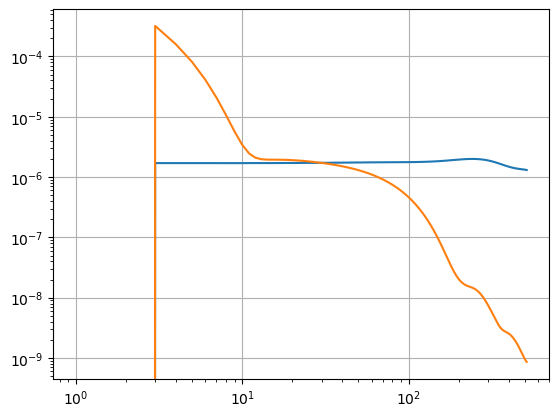

In [20]:
ell = 1:1:2*2^8 + 1

PyPlot.loglog(ell, cl[1:2*2^8 + 1, 3])
PyPlot.loglog(ell, 0.01 * cl_tens[1:2*2^8 + 1, 3])
PyPlot.grid()

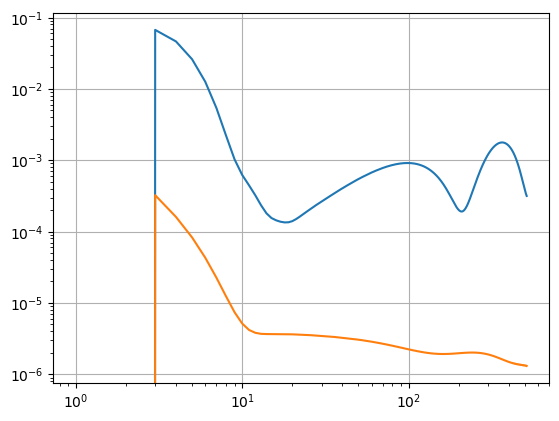

In [5]:
ell = 1:1:2*2^8 + 1

PyPlot.loglog(ell, cl_all[1:2*2^8 + 1, 2])
PyPlot.loglog(ell, cl_all[1:2*2^8 + 1, 3])
PyPlot.grid()

In [36]:
# sigma 計算

sigma_sq = (sqrt.(1 ./ (2 * ell .+ 1)) .* cl[1:2*2^8 + 1, 3]).^ 2;

In [37]:
sigma = sqrt(sum(sigma_sq) / (ell[end] - ell[1] + 1))

1.234209310623853e-7

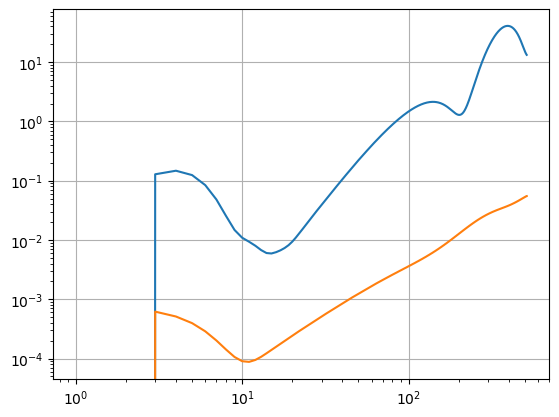

In [6]:
PyPlot.loglog(ell, cl_all[1:2*2^8 + 1, 2] .* ell .* (ell .+ 1) ./ (2 * pi))
PyPlot.loglog(ell, cl_all[1:2*2^8 + 1, 3] .* ell .* (ell .+ 1) ./ (2 * pi))
PyPlot.grid()

### スムージング　テスト　

In [43]:
hp = pyimport("healpy")

PyObject <module 'healpy' from '/Users/ikumakiyoshi/.julia/conda/3/lib/python3.10/site-packages/healpy/__init__.py'>

In [47]:
maps = [cmb_data[1, :], cmb_data[2, :], cmb_data[3, :]];

In [51]:
cmb_alm = hp.sphtfunc.map2alm(maps, lmax = 2*nside)

3×45 Matrix{ComplexF64}:
 -0.240887+0.0im  -0.13482+0.0im  …    -5.39236-2.24304im
       0.0+0.0im       0.0+0.0im     0.00250232-0.0104853im
       0.0+0.0im       0.0+0.0im     0.00136088-0.00309044im

In [55]:
smoothed_cmb_map = hp.sphtfunc.alm2map(cmb_alm, nside, lmax=2*nside, pixwin=true, verbose=false, fwhm=2200*pi/10800.)

3×192 Matrix{Float64}:
 14.0294     26.632     -9.62096   -27.0967    …  25.8248     26.1684
 -0.167799    0.226363  -0.198566    0.12117       0.0560046  -0.0418187
 -0.0482402   0.228876  -0.293357    0.150637      0.0790583   0.00215197

In [63]:
smootinhg_map(maps, 2200, nside)

LoadError: UndefVarError: `smootinhg_map` not defined

In [61]:
#hp.sphtfunc.smoothing(maps, fwhm=2200*pi/10800., lmax=2*nside)

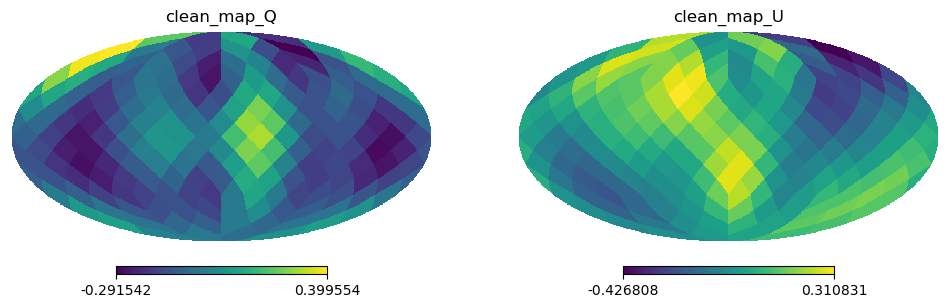

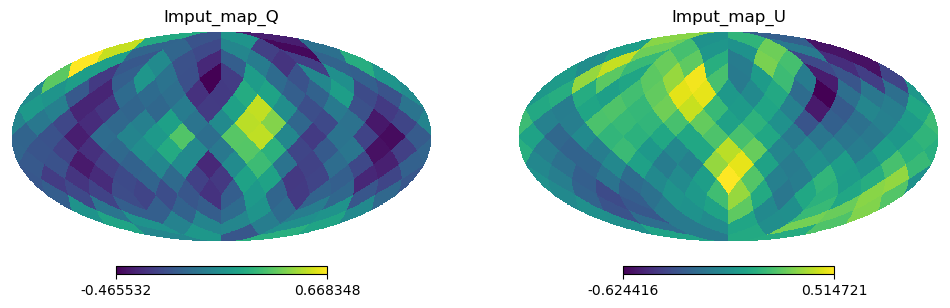

In [56]:
using PyCall

npix = nside2npix(nside)

plt = pyimport("matplotlib.pyplot")
hp = pyimport("healpy")

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

plt.axes(ax1)
hp.mollview(smoothed_cmb_map[2, :], title="clean_map_Q", hold=true)

plt.axes(ax2)
hp.mollview(smoothed_cmb_map[3, :], title="clean_map_U", hold=true)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

plt.axes(ax1)
hp.mollview(cmb_data[2, :], title="Imput_map_Q", hold=true)

plt.axes(ax2)
hp.mollview(cmb_data[3, :], title="Imput_map_U", hold=true)


In [28]:
using NPZ

synch_py = npzread("/Users/ikumakiyoshi/Library/Mobile Documents/com~apple~CloudDocs/study_fg_rm/program/Deltamap_test/julia_delta-map/fg_map_data/Synch_40_GHz_nside_4.npy")

3×192 Matrix{Float32}:
 12.0432   9.05988   11.3287   14.5197   …  15.155     12.4357     9.94151
 -1.65814  0.693689  -1.29841   2.07347      1.99244   -0.911846   1.54643
 -1.75125  1.385     -1.64228   2.08117      0.143399  -0.123093  -0.588082

In [31]:
#m_Q
#m_Q + cmb_data[2]

In [37]:
#synch_py[2, :]

In [38]:
#m_Q - synch_py[2, :]

In [3]:
A = [1 2 3 4 5] 

1×5 Matrix{Int64}:
 1  2  3  4  5

In [4]:
A[1:3]

3-element Vector{Int64}:
 1
 2
 3

In [5]:
for (ii, freq) in enumerate([2 32 33 4])
    print(ii)
end

1234

In [6]:
nside = 4

4

In [7]:
l = 1:1:3*nside - 1

1:1:11

In [8]:
println(l[11])

11


In [16]:
# Julia 1.7
a =0
@time for i in 1:1000000
    global a = π/π/π
end

  1.805350 seconds


In [1]:
function test(A, B)
    C = A \ B
    return C
end

test (generic function with 1 method)

In [2]:
# Julia

# 行列サイズ
matrix_size = 1000

# 行列の生成
A = rand(matrix_size, matrix_size)
B = rand(matrix_size, matrix_size);

# 計算時間の計測


#@time C = A * B

In [6]:
#Threads.nthreads()

In [9]:
@time  test(A, B);

  0.130521 seconds (926 allocations: 61.100 MiB, 1.53% gc time, 6.05% compilation time)


In [12]:
@inbounds @time for i in 1:10
    test(A, B)
end

339.105763 seconds (16.00 k allocations: 59.605 GiB, 0.72% gc time)


In [1]:
using StaticArrays
using LinearAlgebra

# 2次元ベクトルの作成
v = SVector(1.0, 2.0)

# ベクトルの要素へのアクセス
println(v[1])  # 1.0
println(v[2])  # 2.0

# ベクトルの基本的な演算
u = SVector(3.0, 4.0)
w = v + u
println(w)     # SVector{2, Float64}((4.0, 6.0))

# ドット積
dot_product = dot(v, u)
println(dot_product)  # 11.0


1.0
2.0
[4.0, 6.0]
11.0


In [3]:
N = 2

# 普通のベクトル・行列
M0 = randn(N,N)
v0 = randn(N)
@time result0 = M0*M0

# SArray
v1 = @SVector randn(N)
M1 = @SMatrix randn(N,N)  # JITコンパイルなので最初は時間がかかる
@time result1 = M1*M1;

  0.000022 seconds (1 allocation: 96 bytes)
  0.000072 seconds (37 allocations: 1.812 KiB)


In [9]:
include("/Users/ikumakiyoshi/Library/Mobile Documents/com~apple~CloudDocs/study_fg_rm/program/Deltamap_test/julia_delta-map/function_julia/Delta_map_alpha.jl")

make_input_map (generic function with 1 method)

In [10]:
beta_s, freq_bs, freq_bd, beta_d, T_d = -3, 23*10^9, 353*10^9, 1.5, 20.1

d_s_vec_calc_pra(40, freq_bs, beta_s, freq_bd, beta_d, T_d)

([198.10299376952253, 109.62727239226652], [59.45852151291737, -129.4761987870186, -1.2762079017196135], 1042.0474727746725)

In [11]:
Amat_calc_pra([40, 100, 140], 140, "s1", freq_bs, beta_s, freq_bd, beta_d, T_d)

2×2 Matrix{Float64}:
 198.103  15.6558
 109.627  23.0089

In [13]:
AAAAA = Amat_calc_pra([40, 50, 100, 140, 280, 402], 140, "d1 and s1", freq_bs, beta_s, freq_bd, beta_d, T_d)

5×5 Matrix{Float64}:
   59.4585     84.0039    269.62      4375.99     26884.9
 -129.476    -164.181    -340.072    -1013.82      3494.6
   -1.27621    -1.75136    -4.77277    -23.6628     101.132
  198.103     103.791      15.6558       3.11272      4.43106
  109.627      80.5965     23.0089       7.77961     12.6771

In [2]:
random_seed_cmb = 5123
seed_syn = 12345
nside = 4

r =0.01

cmb_data = cmb_make.cmb_make_file(nside, r, random_seed_cmb, seed_syn);

In [4]:
include("function_julia/Delta_map_alpha.jl")
beta_s, freq_bs, freq_bd, beta_d, T_d = -3, 23*10^9, 353*10^9, 1.5, 20.1

Q, U, x = calc_x_pra([40, 100, 140], 140, 4, cmb_data, "s1", freq_bs, beta_s, freq_bd, beta_d, T_d);

### 共分散行列

In [2]:
random_seed_cmb = 5123
seed_syn = 12345
nside = 4

r =0.01

cl_scal, cl_tens = cmb_make.cmb_cl_calc(nside, random_seed_cmb, seed_syn);

In [3]:
clEE = cl_scal[:,2][1:2*nside+1]
clBB = cl_scal[:,3][1:2*nside+1];

In [8]:
using NPZ

# ファイルに保存
#npzwrite("clEE.npy", clEE)
#npzwrite("clBB.npy", clBB)

In [6]:
include("function_julia/cov_mat_calc.jl")

calc_all_cov_mat (generic function with 1 method)

In [10]:
@time cov_sacl = calc_cmb_cov_mat(clEE, clBB, nside)

  0.490727 seconds (13.09 M allocations: 2.700 GiB, 43.02% gc time)


384×384 Matrix{Float64}:
  0.0457664    -0.0337839     0.0264958    …  -1.78257e-18   0.000264153
 -0.0337839     0.0457664    -0.0337839       -0.000264153  -1.74769e-18
  0.0264958    -0.0337839     0.0457664        1.78813e-19  -0.000264153
 -0.0337839     0.0264958    -0.0337839        0.000264153   6.44444e-20
  0.0274094    -0.0116227     0.0122336        0.00431731   -0.00431053
  0.0274094    -0.0181208     0.0122336    …  -0.00431731    0.00474043
 -0.0181208     0.0274094    -0.0116227       -0.00474043    0.00431731
 -0.0116227     0.0274094    -0.0181208        0.00431053   -0.00431731
  0.0122336    -0.0181208     0.0274094        0.00495553   -0.00474043
  0.0122336    -0.0116227     0.0274094       -0.00495553    0.00431053
 -0.0116227     0.0122336    -0.0181208    …  -0.00431053    0.00495553
 -0.0181208     0.0122336    -0.0116227        0.00474043   -0.00495553
  0.0116144    -0.0013142     0.00822145       0.0053921    -0.00579443
  ⋮                                

In [13]:
W, X = calc_WX(4);

In [16]:
# calc_sum_m(Flm, Glm, npix1, npix2, l)
calc_sum_m(X, X, 10, 6, 9)

0.08344336265256196 - 1.3389896830194029e-17im

In [9]:
cov_sacl == transpose(cov_sacl)

true

In [10]:
cov_sacl

384×384 Matrix{Float64}:
  0.0457664    -0.0337839     0.0264958    …  -1.78257e-18   0.000264153
 -0.0337839     0.0457664    -0.0337839       -0.000264153  -1.74769e-18
  0.0264958    -0.0337839     0.0457664        1.78813e-19  -0.000264153
 -0.0337839     0.0264958    -0.0337839        0.000264153   6.44444e-20
  0.0274094    -0.0116227     0.0122336        0.00431731   -0.00431053
  0.0274094    -0.0181208     0.0122336    …  -0.00431731    0.00474043
 -0.0181208     0.0274094    -0.0116227       -0.00474043    0.00431731
 -0.0116227     0.0274094    -0.0181208        0.00431053   -0.00431731
  0.0122336    -0.0181208     0.0274094        0.00495553   -0.00474043
  0.0122336    -0.0116227     0.0274094       -0.00495553    0.00431053
 -0.0116227     0.0122336    -0.0181208    …  -0.00431053    0.00495553
 -0.0181208     0.0122336    -0.0116227        0.00474043   -0.00495553
  0.0116144    -0.0013142     0.00822145       0.0053921    -0.00579443
  ⋮                                

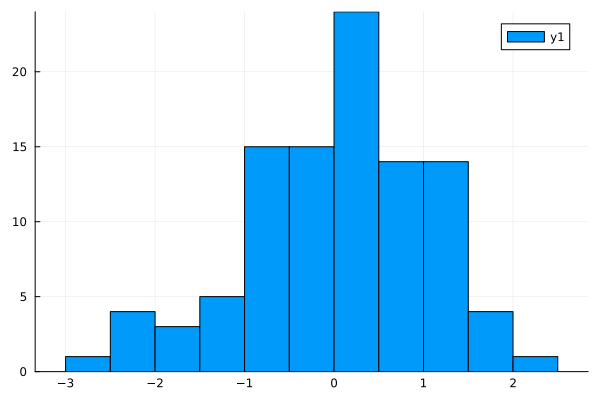

In [2]:
using StatsPlots, Distributions, Random

Random.seed!(1)

# Normal(μ,σ)
d = Normal(0,1)

# rand(Normal(μ,σ), sample) 
x = rand(d, 100) 
histogram(x,bins=20)

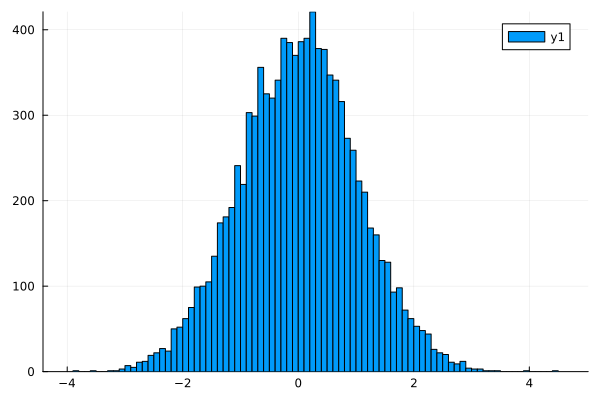

In [7]:
using StatsPlots, Distributions, Random

Random.seed!(1)

# Normal(μ,σ)
d = Normal(0,1)

# rand(Normal(μ,σ), sample) 
x = rand(d, 10000) 
histogram(x,bins=100)

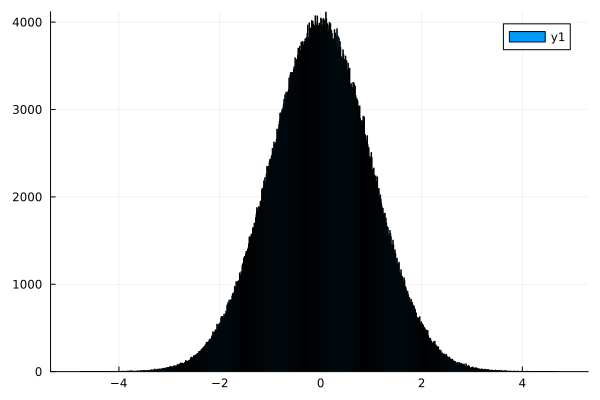

In [1]:
using StatsPlots, Distributions, Random

Random.seed!(1)

# Normal(μ,σ)
d = Normal(0,1)

# rand(Normal(μ,σ), sample) 
x = rand(d, 1000000) 
histogram(x,bins=1000)

In [39]:
include("/Users/ikumakiyoshi/Library/Mobile Documents/com~apple~CloudDocs/study_fg_rm/program/Deltamap_test/julia_delta-map/function_julia/calc_noise.jl")

calc_noise_cov_mat (generic function with 1 method)

In [49]:
noise_seed = [1, 2, 3]
pol_sen = 0.2 # μK
nside = 4;

#noise_cov_mat = calc_noise_cov_mat(pol_sen, nside, noise_seed)

In [48]:
#noise_cov_mat

In [50]:
using LinearAlgebra

function cholesky_logdet(A)
    # ¥コレスキー分解
    L = cholesky(A).L
    
    # 行列の対数行列式の2倍
    logdet = 2 * sum(log.(diag(L)))

    return logdet
end


function regular_det(A)
    det_A = det(A)
    return det_A
end


n = 3
A = rand(n, n)
A = A * A' 

logdet_A = cholesky_logdet(A)

det_A = regular_det(A)

println("行列 A:")
println(A)
println("対数行列式の2倍: ", logdet_A)
println("通常の行列式: ", log(det_A))

行列 A:
[0.07271535331536101 0.2568516397744477 0.2902241579216274; 0.2568516397744477 0.9881791129381172 0.9586039267932265; 0.2902241579216274 0.9586039267932265 1.2132589051222717]
対数行列式の2倍: -13.870434159778453
通常の行列式: -13.870434159775233


In [52]:
nside = 4
lmax = 2 * nside

wl = pixwin(nside, pol=true)

wl[2];
#wl_P = wl[2][1:lmax + 1] * 0 .+ 1

In [68]:
using Optim
f(x) = (1.0 - x[1])^2 + 100.0 * (x[2] - x[1]^2)^2
x0 = [0., 0.]#初期値を0,0とした。
a1 = optimize(f, x0)
xsol = Optim.minimizer(a1) #関数fを最小化するxの値
println("xsol = $xsol")
fmin = Optim.minimum(a1) #関数fの最小値
println("fmin = $fmin")

xsol = [0.9999634355313174, 0.9999315506115275]
fmin = 3.5255270584829996e-9


In [62]:
using Optim
f2(x) = 2x^2+3x+1
a2 = optimize(f2, -2.0, 1.0) #-2から1の間の最小値を探す。
xsol = Optim.minimizer(a2) #関数f2を最小化するxの値
println("xsol = $xsol")
fmin = Optim.minimum(a2) #関数f2の最小値
println("fmin = $fmin")

xsol = -0.75
fmin = -0.125


In [56]:
# using Optim

function f(x)
    global calls += 1
    return (1.0 - x[1])^2 + 100.0 * (x[2] - x[1]^2)^2
end

x0 = [0.0, 0.0]

calls = 0
res = optimize(f, x0, method=NelderMead())
println("手法　　：", Optim.summary(res))
println("最小値　：", Optim.minimum(res))
println("最小点　：", Optim.minimizer(res))
println("反復回数：", Optim.iterations(res))
println("評価総数：", Optim.f_calls(res))
println("実際の数：", calls)

calls = 0
res = optimize(f, x0, method=LBFGS())
println("手法　　：", Optim.summary(res))
println("最小値　：", Optim.minimum(res))
println("最小点　：", Optim.minimizer(res))
println("反復回数：", Optim.iterations(res))
println("評価総数：", Optim.f_calls(res))
println("実際の数：", calls)

手法　　：Nelder-Mead
最小値　：3.5255270584829996e-9
最小点　：[0.9999634355313174, 0.9999315506115275]
反復回数：60
評価総数：117
実際の数：117
手法　　：L-BFGS
最小値　：5.3784046148998115e-17
最小点　：[0.9999999926662393, 0.9999999853324786]
反復回数：24
評価総数：67
実際の数：335


In [4]:
using Optim

# 最小化対象の関数
function my_objective(x)
    return (x[1] - 2)^2 + (x[2] - 3)^2
end

# 初期値
initial_values = [0.0, 0.0]

# 変数の範囲を指定
lower_bounds = [-5.0, -5.0]
upper_bounds = [5.0, 5.0]

# 最小化のオプションを設定
options = Optim.Options(iterations = 100, show_trace = false)

# 最小化を実行
result = optimize(my_objective, lower_bounds, upper_bounds, initial_values, Fminbox(), options)

optimal_values = Optim.minimizer(result)
minimized_value = Optim.minimum(result)

# 結果の表示
println(result)

 * Status: success

 * Candidate solution
    Final objective value:     6.910398e-18

 * Found with
    Algorithm:     Fminbox with L-BFGS

 * Convergence measures
    |x - x'|               = 2.63e-06 ≰ 0.0e+00
    |x - x'|/|x'|          = 7.28e-07 ≰ 0.0e+00
    |f(x) - f(x')|         = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 0.00e+00 ≤ 0.0e+00
    |g(x)|                 = 4.69e-09 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    3
    f(x) calls:    21
    ∇f(x) calls:   21



In [6]:
optimal_values

2-element Vector{Float64}:
 1.9999999988095238
 2.99999999765625

In [76]:
minimized_value

6.910397943609891e-18

In [14]:
# 初期値
initial_values = [5.0, 5.0]

# 変数の範囲を指定
lower_bounds = [-5.0, -5.0]
upper_bounds = [5.0, 5.0]

# 初期位置がボックスの外にある場合、ボックス内に移動させる
initial_values = max.(lower_bounds, min.(upper_bounds, initial_values))

# 最小化のオプションを設定
options = Optim.Options(iterations = 100, show_trace = false)

# 最小化を実行
result = optimize(my_objective, lower_bounds, upper_bounds, initial_values, Fminbox(), options)

optimal_values = Optim.minimizer(result)
minimized_value = Optim.minimum(result)

# 結果の表示
println(result)


 * Status: success

 * Candidate solution
    Final objective value:     1.146987e-18

 * Found with
    Algorithm:     Fminbox with L-BFGS

 * Convergence measures
    |x - x'|               = 1.01e-07 ≰ 0.0e+00
    |x - x'|/|x'|          = 2.80e-08 ≰ 0.0e+00
    |f(x) - f(x')|         = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 0.00e+00 ≤ 0.0e+00
    |g(x)|                 = 1.87e-09 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    3
    f(x) calls:    15
    ∇f(x) calls:   15



┌ Warning: Initial position cannot be on the boundary of the box. Moving elements to the interior.
│ Element indices affected: [1, 2]
└ @ Optim ~/.julia/packages/Optim/V8ZEC/src/multivariate/solvers/constrained/fminbox.jl:314


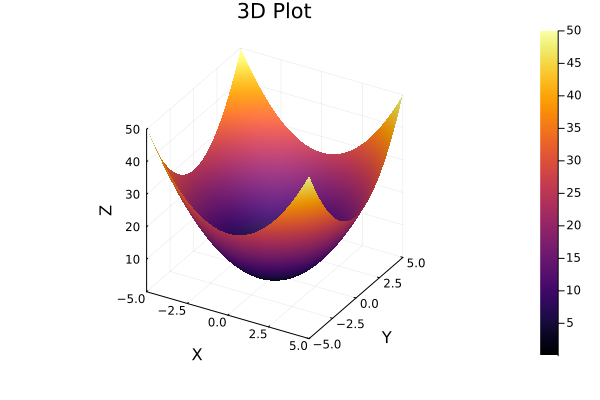

In [15]:
using Plots

# 2変数関数の例
f(x, y) = x^2 + y^2

# プロット範囲の設定
x_range = range(-5, stop=5, length=100)
y_range = range(-5, stop=5, length=100)

# 2変数関数の値の計算
z_values = [f(x, y) for x in x_range, y in y_range]

# 3Dプロット
plot(x_range, y_range, z_values, st=:surface, xlabel="X", ylabel="Y", zlabel="Z", title="3D Plot")

In [11]:
using JuMP
using NLopt

# カスタム目的関数の定義
function my_custom_objective(x, y)
    return x^2 + y^2  # 例として単純な二次関数
end

# JuMPモデルの作成
model = Model(optimizer_with_attributes(NLopt.Optimizer, "algorithm" => :LN_COBYLA))

# 変数の定義
@variable(model, x)
@variable(model, y)

# 目的関数の登録と設定
JuMP.register(model, :my_custom_objective, 2, my_custom_objective, autodiff=true)
@NLobjective(model, Min, my_custom_objective(x, y))

# 制約の追加
@constraint(model, y == 10) # y を 10 に固定

# 最適化の実行（JuMPのoptimize!を使用）
JuMP.optimize!(model)

# 結果の取得
println("最小値: ", JuMP.objective_value(model))
println("最適解 x = ", JuMP.value(x), ", y = ", JuMP.value(y))

最小値: 100.0
最適解 x = 5.115907697472721e-13, y = 10.0


In [10]:
using JuMP
using NLopt

# カスタム目的関数の定義
function my_custom_objective(x, y)
    return x^2 + y^2  # 単純な二次関数
end

# JuMPモデルの作成
model = Model(optimizer_with_attributes(NLopt.Optimizer, "algorithm" => :LN_COBYLA))

# 変数の定義（xの範囲を設定）
@variable(model, 0 <= x <= 5)
@variable(model, y)  # yは固定値に設定されるため、範囲は不要

# 目的関数の登録と設定
JuMP.register(model, :my_custom_objective, 2, my_custom_objective, autodiff=true)
@NLobjective(model, Min, my_custom_objective(x, y))

# 制約の追加（yを10に固定）
@constraint(model, y == 10)

# 最適化の実行（JuMPのoptimize!を使用）
JuMP.optimize!(model)

# 結果の取得
println("最小値: ", JuMP.objective_value(model))
println("最適解 x = ", JuMP.value(x), ", y = ", JuMP.value(y))

最小値: 100.0
最適解 x = 0.0, y = 10.0


In [17]:
using JuMP
using NLopt

# 目的関数の定義
function objective_function(x, y)
    return (x - 2)^2 + (y - 3)^2  # 例として (2, 3) を最小化する目的関数
end

# JuMPモデルの作成
model = Model(optimizer_with_attributes(NLopt.Optimizer, "algorithm" => :LN_COBYLA))

# 変数の定義と範囲制約の設定
@variable(model, 0 <= x <= 5)
@variable(model, y)

# 固定された変数に対する制約条件
@constraint(model, x == 2.0)  # 例として x を 2.0 に固定

# 目的関数の登録と設定
JuMP.register(model, :objective_function, 2, objective_function; autodiff = true)
@NLobjective(model, Min, objective_function(x, y))

# 最適化の実行
JuMP.optimize!(model)

# 結果の取得
println("最小値: ", JuMP.objective_value(model))
println("最適解 x = ", JuMP.value(x), ", y = ", JuMP.value(y))

最小値: 1.1938870247196556e-14
最適解 x = 2.0, y = 3.0000001092651374


In [8]:
using PyCall
using PyPlot

@pyimport sys
pushfirst!(PyVector(pyimport("sys")["path"]), "/Users/ikumakiyoshi/Library/Mobile Documents/com~apple~CloudDocs/study_fg_rm/program/Deltamap_test/julia_delta-map/function_julia")

@pyimport cmb_make_file as cmb_make
@pyimport smoothing_map as sm

include("/Users/ikumakiyoshi/Library/Mobile Documents/com~apple~CloudDocs/study_fg_rm/program/Deltamap_test/julia_delta-map/function_julia/make_data_m.jl")
include("/Users/ikumakiyoshi/Library/Mobile Documents/com~apple~CloudDocs/study_fg_rm/program/Deltamap_test/julia_delta-map/function_julia/Delta_map.jl")
include("/Users/ikumakiyoshi/Library/Mobile Documents/com~apple~CloudDocs/study_fg_rm/program/Deltamap_test/julia_delta-map/function_julia/Delta_map_alpha.jl")
include("/Users/ikumakiyoshi/Library/Mobile Documents/com~apple~CloudDocs/study_fg_rm/program/Deltamap_test/julia_delta-map/function_julia/cov_mat_calc.jl")
include("/Users/ikumakiyoshi/Library/Mobile Documents/com~apple~CloudDocs/study_fg_rm/program/Deltamap_test/julia_delta-map/function_julia/calc_noise.jl");

Using CAMB 1.5.2 installed at /Users/ikumakiyoshi/.julia/conda/3/lib/python3.10/site-packages/camb


In [10]:
random_seed_cmb = 5123
#seed_syn = 12345
seed_syn = 1
nside = 4

r =0.01

cmb_data = cmb_make.cmb_make_file(nside, r, random_seed_cmb, seed_syn);

In [11]:
cmb_data

3×192 Matrix{Float64}:
 -18.1591     7.77152   -107.141     …  16.2805     44.3245     155.832
   0.552072  -0.311302     0.256712      0.0093227   0.0479981   -0.168213
  -0.170293   0.24953     -0.246854     -0.0188169  -0.190376    -0.0389282

In [14]:
using Healpix

cmb_I = Healpix.readMapFromFITS("/Users/ikumakiyoshi/Library/Mobile Documents/com~apple~CloudDocs/study_fg_rm/program/Deltamap_test/cmb_map_files/r_0.01_nside_4_seed_1", 1, Float64)
cmb_Q =Healpix.readMapFromFITS("/Users/ikumakiyoshi/Library/Mobile Documents/com~apple~CloudDocs/study_fg_rm/program/Deltamap_test/cmb_map_files/r_0.01_nside_4_seed_1", 2, Float64)
cmb_U =Healpix.readMapFromFITS("/Users/ikumakiyoshi/Library/Mobile Documents/com~apple~CloudDocs/study_fg_rm/program/Deltamap_test/cmb_map_files/r_0.01_nside_4_seed_1", 3, Float64);

In [17]:
cmb_IQU = [cmb_I'; cmb_Q'; cmb_U']

3×192 Matrix{Float64}:
 -18.1591     7.77152   -107.141     …  16.2805     44.3245     155.832
   0.552072  -0.311302     0.256712      0.0093227   0.0479981   -0.168213
  -0.170293   0.24953     -0.246854     -0.0188169  -0.190376    -0.0389282

In [21]:
using NPZ

@time cov_mat_scal = npzread("/Users/ikumakiyoshi/Library/Mobile Documents/com~apple~CloudDocs/study_fg_rm/program/Deltamap_test/julia_delta-map/covariance_matrix/cov_mat_scal.npy")
@time cov_mat_tens = npzread("/Users/ikumakiyoshi/Library/Mobile Documents/com~apple~CloudDocs/study_fg_rm/program/Deltamap_test/julia_delta-map/covariance_matrix/cov_mat_tens.npy");

  0.000567 seconds (47 allocations: 2.254 MiB)
  0.000570 seconds (47 allocations: 2.254 MiB)
